<a href="https://colab.research.google.com/github/LeeSeungYun1020/Machine_Learning/blob/main/colab/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 당뇨병 환자의 1년 후 병의 진전된 정도를 예측하는 모델

- E(경험) 당뇨병 환자 데이터가 있는가? => 있음
- (알고리즘)어떤 머신러닝 알고리즘을 사용할 것인가? => 선형 회귀
- P(성능)성능 측정은 어떻게 할 수 있는가? => 나중에

1. 데이터를 불러온다.
2. 데이터를 확인한다. (시각화)
3. 데이터를 전처리한다. (결측치 처리)
4. 머신러닝 알고리즘에 적합한 형태로 데이터를 준비한다.
5. 머신러닝 알고리즘에 적용한다.
6. 머신러닝 알고리즘을 평가한다.
7. 머신러닝 알고리즘을 개선한다.
8. 원하는 결과가 나올 때까지 1-7을 반복한다.

## 데이터를 불러온다.

In [ ]:
# scikit-learn에서 제공하는 당뇨병 데이터 불러온다.
from sklearn.datasets import load_diabetes

In [ ]:
# 당뇨병 데이터 변수에 할당
diabetes = load_diabetes()
diabetes

{'DESCR': '.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - Age\n      - Sex\n      - Body mass index\n      - Average blood pressure\n      - S1\n      - S2\n      - S3\n      - S4\n      - S5\n      - S6\n\nNote: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).\n\nSource URL:\nhttps://www4.stat.ncsu.edu/~boos/var.select/

## 데이터를 확인한다.

In [ ]:
#print(diabetes.DESCR)
print(diabetes.keys())
print(diabetes.data.shape, diabetes.target.shape)
print(diabetes.feature_names)

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])
(442, 10) (442,)
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [ ]:
diabetes.data[0]

array([ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
       -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613])

In [ ]:
diabetes.target[0]

151.0

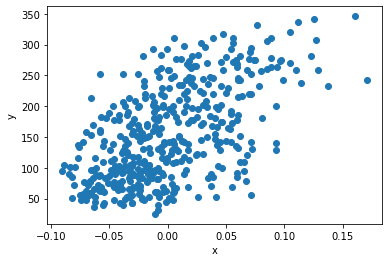

In [ ]:
# 시각화
import matplotlib.pyplot as plt
plt.scatter(diabetes.data[:,2], diabetes.target)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## 데이터를 전처리한다.

In [ ]:
# scikit- learn 에서 제공하는 데이터 셋을 살펴본 결과 전처리가 필요하지 않다.

## 머신러닝 알고리즘에 적합한 형태로 데이터를 준비한다.
- 적합한 형태로 데이터로 변경하라 - 훈련데이터는 준비되었다.
- => 검증 데이터는? - 반반씩 나눠보자
- => 앞부분만 써도 되나? - 무작위로 뽑아야

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2)
print(x_train.shape, x_test.shape)

(353, 10) (89, 10)


## 머신러닝 알고리즘에 적용한다.
- 선형회귀

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
model.score(x_test, y_test)

0.5134594590746206

In [ ]:
model.coef_

array([ -13.04219793, -227.95073276,  491.78577055,  355.96536183,
       -952.96872957,  634.87445627,  137.84986153,  165.55935161,
        787.06674201,   41.88575357])

In [ ]:
model.intercept_

153.82058041513912

In [ ]:
model.predict(x_test)

array([254.94328528, 136.99452336,  77.70086372, 169.11389411,
       152.84914621, 125.93422462, 103.68977484,  87.1936565 ,
       195.02413599, 176.02809751,  88.73985025, 126.66439273,
       185.11026363, 231.29312624, 215.27390854, 176.87341945,
       150.40328025, 222.97102879, 121.75938737, 167.86957688,
       110.72802703,  77.68768018, 101.53698409, 170.47189727,
       137.06696797,  84.99055398, 149.34909586, 142.80745591,
       126.1614595 , 178.04617057,  70.10731414,  72.07401966,
       153.90331643, 184.33585097,  66.38535424, 165.48277424,
       101.30150349, 153.27270254, 103.12790179, 179.92814317,
       140.84982355, 149.17526946, 132.07300435, 132.62319343,
       160.14701359, 117.40909224, 118.28790793,  65.75606779,
       227.25005265,  90.65601989,  99.20740926, 143.81863307,
       236.57032664, 179.67165684, 120.97852601, 168.83660466,
        89.75031598, 159.18322875, 180.15511039, 199.26260816,
       111.50635924, 160.331512  , 240.11482584, 220.08

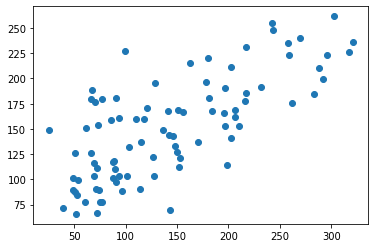

In [ ]:
y_pred = model.predict(x_test)
plt.scatter(y_test, y_pred)

plt.show()